# Uncomment and Run to See Image Sample(s)

In [ ]:
# def draw_images(image_file):

#     img = cv2.imread(base_path + '/annotated-images/' + image_file.split('.')[0] + '.jpg')
    
#     infile_xml = open(base_path + '/annotated-images/' + file)
#     tree = ElementTree.parse(infile_xml)
#     root = tree.getroot()
    
#     for obj in root.iter('object'):
#         cls_name = obj.find('name').text
#         xmlbox = obj.find('bndbox')
#         xmin = int(xmlbox.find('xmin').text)
#         xmax = int(xmlbox.find('xmax').text)
#         ymin = int(xmlbox.find('ymin').text)
#         ymax = int(xmlbox.find('ymax').text)

#         font = cv2.FONT_HERSHEY_SIMPLEX

#         # put text
#         cv2.putText(img,cls_name,(xmin,ymin-10),font,1,(0,255,0),2,cv2.LINE_AA)

#         # draw bounding box
#         cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0),3)
#     return img

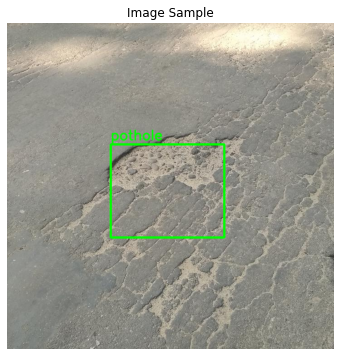

In [ ]:
# tmp = []
# for file in file_list:
#     if file.endswith('.xml'):
#         tmp.append(file)
        
        
# fig = plt.figure(figsize=(6,6))
# for number, image in enumerate(tmp[0:1]):
#     img = draw_images(image)
#     plt.subplot(1,1,1)
#     plt.axis('off')
#     plt.title('Image Sample')
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# YOLOv3 (start from here)

In [ ]:
!pip install imageai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 7.4 MB/s 
     |████████████████████████████████| 11.6 MB 69.6 MB/s 
     |████████████████████████████████| 2.9 MB 47.9 MB/s 
     |████████████████████████████████| 26.1 MB 1.2 MB/s 
     |████████████████████████████████| 2.1 MB 55.6 MB/s 
     |████████████████████████████████| 14.9 MB 45.1 MB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=b562f27c0f9aa71065a03001bfba5710d431dad8b636177497a627ade980e024
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scip

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 6.7 MB/s 
     |████████████████████████████████| 15.7 MB 137 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.3
    Uninstalling numpy-1.19.3:
      Successfully uninstalled numpy-1.19.3
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.4.1 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.4.1 which is incompatible.
jaxlib 0.3.14+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.4.1 which is incompatible.
jax 0.3.14 requires scipy>=1.5, but 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from shutil import copyfile
import tensorflow as tf

import os

import time, cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data and Label Preparation

In [ ]:
# import zipfile

# local_file = 'Potholes Dataset.zip'
# zip_ref = zipfile.ZipFile(local_file, 'r')
# zip_ref.extractall('data/')
# zip_ref.close()

In [ ]:
# cls_names = []
# imgs = []

# file_list = [filename for filename in os.listdir('/content/drive/MyDrive/Dataset/data/annotated-images/')]

# for file in file_list:
#   if file.endswith('.jpg'):
#     imgs.append(file)
#   else:
#     cls_names.append(file)

# print("total")
# print("# of images：" + str(len(imgs)))
# print("# of labels：" + str(len(cls_names)))

total
# of images：665
# of labels：665


In [ ]:
import json

f = open('/content/drive/MyDrive/data/splits.json')

data = json.load(f)
train = data['train']
test = data['test']

In [ ]:
print(len(train))

532


In [ ]:
# Run jika direktori belum dibuat

# os.mkdir(os.path.join('/content/drive/MyDrive/Dataset/data/', 'training'))
# os.mkdir(os.path.join('/content/drive/MyDrive/Dataset/data/', 'validation'))
# os.mkdir(os.path.join('/content/drive/MyDrive/Dataset/data/training/', 'images'))
# os.mkdir(os.path.join('/content/drive/MyDrive/Dataset/data/training/', 'annotations'))
# os.mkdir(os.path.join('/content/drive/MyDrive/Dataset/data/validation/', 'images'))
# os.mkdir(os.path.join('/content/drive/MyDrive/Dataset/data/validation/', 'annotations'))

In [ ]:
# tmp_train = [item.split('.')[0] for item in train]
# tmp_test = [item.split('.')[0] for item in test]

In [ ]:
# Run untuk memindahkan files yang belum dikelompokkan

# for item in imgs:
#   if item.split('.')[0] in tmp_train:
#     copyfile(os.path.join('/content/drive/MyDrive/Dataset/data/annotated-images/', item), os.path.join('/content/drive/MyDrive/Dataset/data/train/images', item))
#   elif item.split('.')[0] in tmp_test:
#     copyfile(os.path.join('/content/drive/MyDrive/Dataset/data/annotated-images/', item), os.path.join('/content/drive/MyDrive/Dataset/data/validation/images', item))

# for item in cls_names:
#   if item in train:
#     copyfile(os.path.join('/content/drive/MyDrive/Dataset/data/annotated-images/', item), os.path.join('/content/drive/MyDrive/Dataset/data/potholes/train/annotations', item))
#   elif item in test:
#     copyfile(os.path.join('/content/drive/MyDrive/Dataset/data/annotated-images/', item), os.path.join('/content/drive/MyDrive/Dataset/data/potholes/validation/annotations', item))

In [ ]:
%cd /content/drive/MyDrive/data/

/content/drive/.shortcut-targets-by-id/1mafi1FhZXN_kxmseQeapDp8VL4HkIM4b/data


In [ ]:
# Modifikasi file .xml

# import xml.etree.ElementTree as et

# for file in os.listdir('/content/drive/MyDrive/data/potholes/train/annotations'):
#   x = et.parse('/content/drive/MyDrive/data/potholes/train/annotations/' + file)
#   myroot = x.getroot()
#   myroot[0].text = 'images'
#   myroot[2].text = '/content/drive/MyDrive/data/potholes/train/images/' + file.split('.')[0] + '.jpg'
#   x.write(file)

# for file in os.listdir('/content/drive/MyDrive/data/potholes/validation/annotations'):
#   x = et.parse('/content/drive/MyDrive/data/potholes/validation/annotations/' + file)
#   myroot = x.getroot()
#   myroot[0].text = 'images'
#   myroot[2].text = '/content/drive/MyDrive/data/potholes/validation/images/' + file.split('.')[0] + '.jpg'
#   x.write(file)

# Modelling and Evaluating

In [ ]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="potholes")
trainer.setTrainConfig(object_names_array=["pothole"], num_experiments=50, train_from_pretrained_model="pretrained-yolov3.h5")
# In the above,when training for detecting multiple objects,
#set object_names_array=["object1", "object2", "object3",..."objectz"]
trainer.trainModel()

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.70
Anchor Boxes generated.
Detection configuration saved in  potholes/json/detection_config.json
Evaluating over 133 samples taken from potholes/validation
Training over 532 samples  given at potholes/train
Training on: 	['pothole']
Training with Batch Size:  4
Number of Training Samples:  532
Number of Validation Samples:  133
Number of Experiments:  50
Training with transfer learning from pretrained Model


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/imageai/Detection/Custom/__init__.py:317: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  max_queue_size=8
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Layer YoloLayer has arguments ['self', 'anchors', 'max_grid', 'batch_size', 'warmup_batches', 'ignore_thresh', 'grid_scale', 'obj_scale', 'noobj_scale', 'xywh_scale', 'class_scale']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config
Epoch 1/50
1064/1064 [==============================] - 763s 701ms/step - loss: 41.3129 - yolo_layer_loss: 6.8925 - yolo_layer_1_loss: 9.6146 - yolo_layer_2_loss: 14.6397 - val_loss: 30.3781 - val_yolo_layer_loss: 5.7276 - val_yolo_layer_1_loss: 6.9588 - val_yolo_layer_2_loss: 9.3604 - lr: 1.0000e-04
Epoch 2/50
1064/1064 [==============================] - 720s 676ms/step - loss: 30.2561 - yolo_layer_loss: 5.05

In [ ]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="potholes")
metrics = trainer.evaluateModel(model_path="potholes/models/detection_model-ex-030--loss-0016.231.h5", json_path="potholes/json/detection_config.json", iou_threshold=0.5, object_threshold=0.3, nms_threshold=0.5)

Starting Model evaluation....
Evaluating over 133 samples taken from potholes/validation
Training over 532 samples  given at potholes/train


Model File:  potholes/models/detection_model-ex-030--loss-0016.231.h5 

Evaluation samples:  133
Using IoU:  0.5
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
pothole: 0.2282
mAP: 0.2282


In [ ]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("potholes/models/detection_model-ex-030--loss-0016.231.h5")
detector.setJsonPath("potholes/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image="potholes/img-006.jpeg", output_image_path="potholes/img-006-detected.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('potholes/models/detection_model-ex-030--loss-0016.231.h5')
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_model = converter.convert()
# open("model_jalanannn.tflite", "wb").write(tflite_model)

# Creating Metadata for the Model

In [ ]:
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import writer_utils
from tflite_support import metadata
import flatbuffers
import os
from tensorflow_lite_support.metadata import metadata_schema_py_generated as _metadata_fb
from tensorflow_lite_support.metadata.python import metadata as _metadata
from tensorflow_lite_support.metadata.python.metadata_writers import metadata_info
from tensorflow_lite_support.metadata.python.metadata_writers import metadata_writer
from tensorflow_lite_support.metadata.python.metadata_writers import writer_utils

ObjectDetectorWriter = object_detector.MetadataWriter

_MODEL_PATH = "potholes/models/model_jalanannn.tflite"
_LABEL_FILE = "potholes/models/label.txt"
_SAVE_TO_PATH = "potholes/models/model_wmeta.tflite"

writer = ObjectDetectorWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [127.5], [127.5], [_LABEL_FILE])
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

# Verify the populated metadata and associated files.
displayer = metadata.MetadataDisplayer.with_model_file(_SAVE_TO_PATH)
print("Metadata populated:")
print(displayer.get_metadata_json())
print("Associated file(s) populated:")
print(displayer.get_packed_associated_file_list())

model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "poholes_detector"
model_meta.description = (
    "Identify which of a known set of objects might be present and provide "
    "information about their positions within the given image or a video "
    "stream.")

# Creates input info.
input_meta = _metadata_fb.TensorMetadataT()
input_meta.name = "image"
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_meta.content.contentProperties.colorSpace = (
    _metadata_fb.ColorSpaceType.RGB)
input_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.ImageProperties)
input_normalization = _metadata_fb.ProcessUnitT()
input_normalization.optionsType = (
    _metadata_fb.ProcessUnitOptions.NormalizationOptions)
input_normalization.options = _metadata_fb.NormalizationOptionsT()
input_normalization.options.mean = [127.5]
input_normalization.options.std = [127.5]
input_meta.processUnits = [input_normalization]
input_stats = _metadata_fb.StatsT()
input_stats.max = [255]
input_stats.min = [0]
input_meta.stats = input_stats

# Creates outputs info.
output_location_meta = _metadata_fb.TensorMetadataT()
output_location_meta.name = "location"
output_location_meta.description = "The locations of the detected boxes."
output_location_meta.content = _metadata_fb.ContentT()
output_location_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.BoundingBoxProperties)
output_location_meta.content.contentProperties = (
    _metadata_fb.BoundingBoxPropertiesT())
output_location_meta.content.contentProperties.index = [1, 0, 3, 2]
output_location_meta.content.contentProperties.type = (
    _metadata_fb.BoundingBoxType.BOUNDARIES)
output_location_meta.content.contentProperties.coordinateType = (
    _metadata_fb.CoordinateType.RATIO)
output_location_meta.content.range = _metadata_fb.ValueRangeT()
output_location_meta.content.range.min = 2
output_location_meta.content.range.max = 2

output_class_meta = _metadata_fb.TensorMetadataT()
output_class_meta.name = "category"
output_class_meta.description = "The categories of the detected boxes."
output_class_meta.content = _metadata_fb.ContentT()
output_class_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_class_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
output_class_meta.content.range = _metadata_fb.ValueRangeT()
output_class_meta.content.range.min = 2
output_class_meta.content.range.max = 2
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename("labelmap.txt")
label_file.description = "Label of objects that this model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_VALUE_LABELS
output_class_meta.associatedFiles = [label_file]

output_score_meta = _metadata_fb.TensorMetadataT()
output_score_meta.name = "score"
output_score_meta.description = "The scores of the detected boxes."
output_score_meta.content = _metadata_fb.ContentT()
output_score_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_score_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
output_score_meta.content.range = _metadata_fb.ValueRangeT()
output_score_meta.content.range.min = 2
output_score_meta.content.range.max = 2

output_number_meta = _metadata_fb.TensorMetadataT()
output_number_meta.name = "number of detections"
output_number_meta.description = "The number of the detected boxes."
output_number_meta.content = _metadata_fb.ContentT()
output_number_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_number_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())

# Creates subgraph info.
group = _metadata_fb.TensorGroupT()
group.name = "detection result"
group.tensorNames = [
    output_location_meta.name, output_class_meta.name,
    output_score_meta.name
]
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [
    output_location_meta, output_class_meta, output_score_meta
]
subgraph.outputTensorGroups = [group]
model_meta.subgraphMetadata = [subgraph]

b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

Metadata populated:
{
  "name": "ObjectDetector",
  "description": "Identify which of a known set of objects might be present and provide information about their positions within the given image or a video stream.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be detected.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
    